# GridSearchCV (모듈적용)

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from helper.regrassion import *
from helper.util import *
from helper.plot import *
from helper.analysis import *

### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/fish.xlsx", info=False)
my_pretty_table(origin.head())

+----+--------+--------+--------+--------+
|    |   길이 |   높이 |   두께 |   무게 |
|----+--------+--------+--------+--------|
|  0 |    8.4 |   2.11 |   1.41 |    5.9 |
|  1 |   13.7 |   3.53 |      2 |     32 |
|  2 |     15 |   3.82 |   2.43 |     40 |
|  3 |   16.2 |   4.59 |   2.63 |   51.5 |
|  4 |   17.4 |   4.59 |   2.94 |     70 |
+----+--------+--------+--------+--------+


## #02. 데이터 전처리

### [1] 데이터 스케일링

In [3]:
df = my_standard_scaler(origin, yname='무게')
my_pretty_table(df.head())

+----+----------+----------+----------+--------+
|    |     길이 |     높이 |     두께 |   무게 |
|----+----------+----------+----------+--------|
|  0 | -2.18023 | -2.01651 | -1.89617 |    5.9 |
|  1 | -1.58743 |  -1.5187 | -1.56077 |     32 |
|  2 | -1.44203 | -1.41704 | -1.31633 |     40 |
|  3 | -1.30782 |  -1.1471 | -1.20263 |   51.5 |
|  4 |  -1.1736 |  -1.1471 | -1.02641 |     70 |
+----+----------+----------+----------+--------+


### [2] 독립, 종속 변수 분리

In [4]:
yname = '무게'
x = df.drop(yname, axis=1)
y = df[yname]
x.shape, y.shape

((56, 3), (56,))

## #03. Linear Regrassion Total Solution

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          -10.7671 |
+----+-------------------+

[회귀식]
무게 = 26.002 * 길이 + 191.703 * 높이 + 118.317 * 두께 + 382.239

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.942303 |             62.5758 |             6847.54 |          82.7499 |                         124.554 |               97.1079 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[선형회귀분석 결과보고]
+----+------------+------------+--------------------+-------

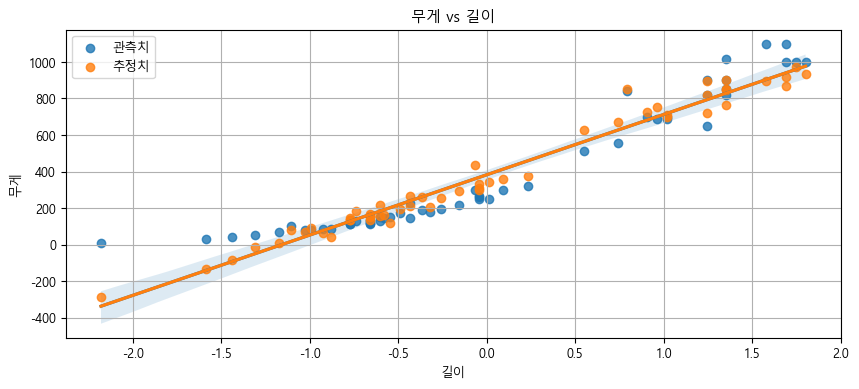

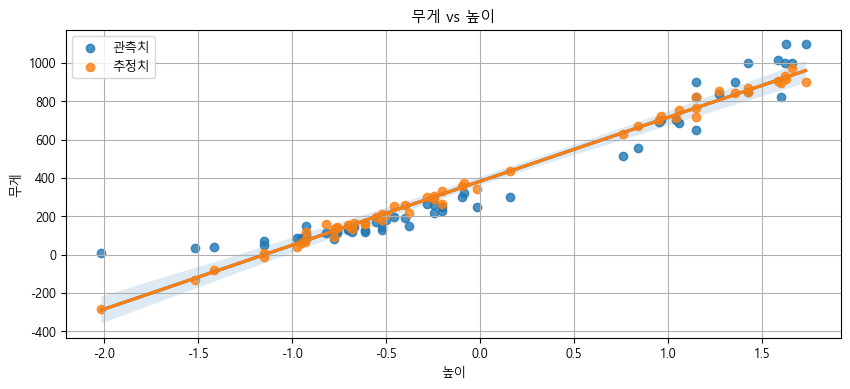

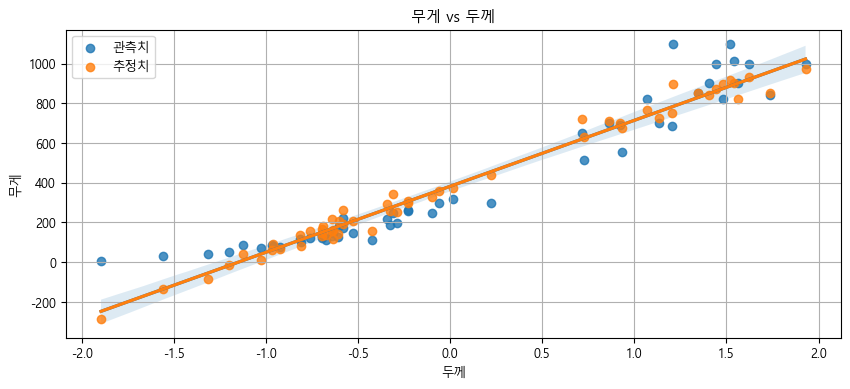



[잔차의 가정 확인] ==============================
[잔차의 선형성 가정]


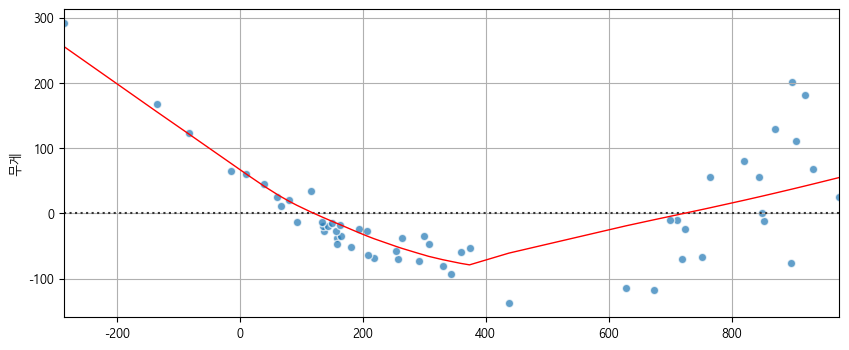


[잔차의 정규성 가정]


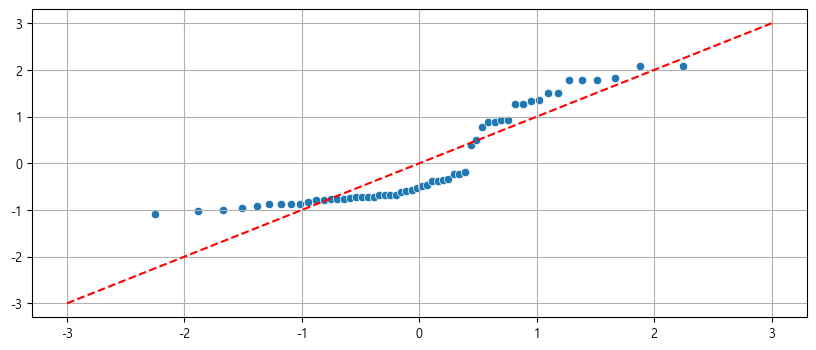

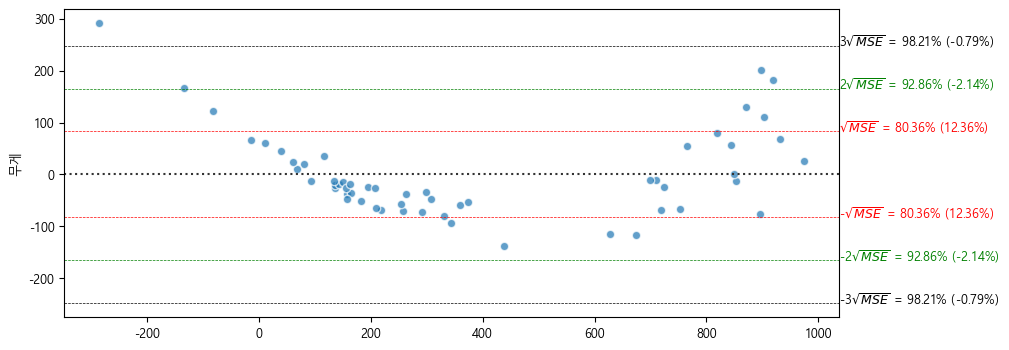

루트 1MSE 구간에 포함된 잔차 비율: 80.36% (12.357142857142861)
루트 2MSE 구간에 포함된 잔차 비율: 92.86% (-2.142857142857139)
루트 3MSE 구간에 포함된 잔차 비율: 98.21% (-0.7857142857142918)
잔차의 정규성 가정 충족 여부: False

[잔차의 등분산성 가정]
잔차의 등분산성 가정 충족 여부: True
+-----------+----------+
|           |   values |
|-----------+----------|
| statistic |  2.48228 |
| p-value   | 0.478502 |
| f-value   | 0.803962 |
| f p-value | 0.497364 |
+-----------+----------+

[잔차의 독립성 가정]
Durbin-Watson: 0.4848900475687648, 잔차의 독립성 가정 만족 여부: False


LinearRegression(n_jobs=-1)

In [5]:
my_linear_regrassion(x, y, cv=5, use_plot=True, report=True, resid_test=True, dpi=100)